# Xây dựng mạng Neural hồi quy phân loại iris_data

In [2]:
import os
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
data_raw = load_iris()
X = data_raw['data']
y0 = data_raw['target'].reshape(-1,1)

(150, 1)


In [5]:
import tensorflow as tf

In [33]:
y = tf.keras.utils.to_categorical(y0, num_classes=3)

(150, 3)


In [31]:
header = ['SepalLength','SepalWidth','PentalLenght','PentalWidth','Species_0','Species_1','Species_2']
df = pd.DataFrame(np.concatenate([X,y],axis=1),columns=header)
df.head(5)

,SepalLength,SepalWidth,PentalLenght,PentalWidth,Species_0,Species_1,Species_2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [8]:
scaler  = MinMaxScaler()
X = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)
n_vars = X_train.shape[1]

In [16]:
my_model = Sequential()
my_model.add(Dense(input_dim = n_vars, units = 3, activation = 'softmax'))

I0000 00:00:1749117142.929448  168609 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1215 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [17]:
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
n_epochs = 500
batch_size = 10
learn_rate = 0.005

In [23]:
my_optimizer = Adam(learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

In [37]:
my_summary = my_model.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size, validation_split =0.2, verbose=0)

I0000 00:00:1749118154.178132  170974 service.cc:152] XLA service 0x7bf6a8005e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749118154.178148  170974 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-06-05 17:09:14.189173: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749118154.224394  170974 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1749118154.457876  170974 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


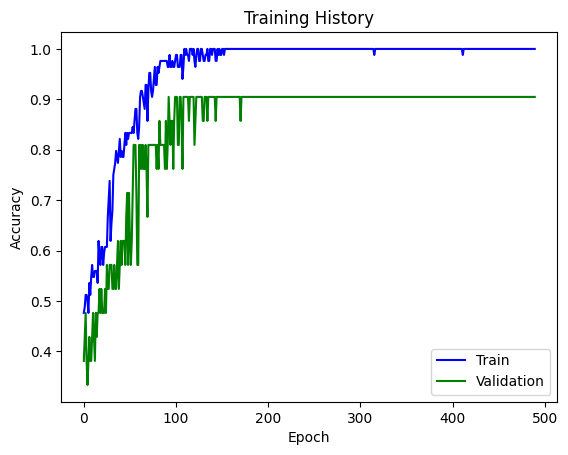

In [39]:
n_skip = 10
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:],c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'lower right')
plt.show()

In [40]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy:{}".format(np.round(ACC,3)))

Test Accuracy:0.956
